In [1]:
from src.data.pipelines import unet_pipeline

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds

import src.data.datasets.deep_globe_2018

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-12 20:56:11.475172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 1
SPLIT_TRAIN = ':100'
SPLIT_VALID = '10:20'
SPLIT_TEST = '20:30'

In [3]:
(train, valid, test) = unet_pipeline.getUNetPipeline(
    SPLIT_TRAIN,
    SPLIT_VALID,
    SPLIT_TEST,
    BATCH_SIZE,
    IMAGE_SIZE
)

2024-02-12 20:56:14.141757: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
def display(display_list):
    plt.figure(figsize=(3, 3))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    print(len(display_list))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i][0]))
        plt.axis('off')
    plt.show()

In [5]:
def one_hot_to_rgb(one_hot_map):
    palette = [
        [0, 255, 255],   # urban_land
        [255, 255, 0],   # agriculture_land
        [255, 0, 255],   # rangeland
        [0, 255, 0],     # forest_land
        [0, 0, 255],     # water
        [255, 255, 255], # barren_land
        [0, 0, 0]        # unknown
    ]

    one_hot_map = tf.cast(one_hot_map, tf.int32)
    # Use one-hot map and palette to reconstruct RGB image
    reconstructed_image = tf.reduce_sum(tf.expand_dims(one_hot_map, axis=-1) * tf.constant(palette), axis=-2)

    return tf.cast(reconstructed_image, dtype=tf.uint8)

1


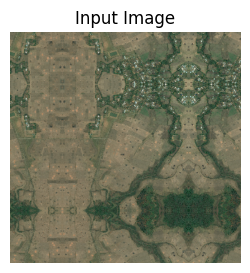

1


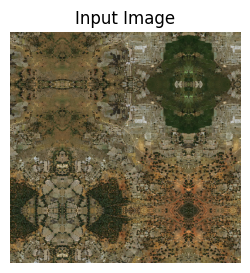

1


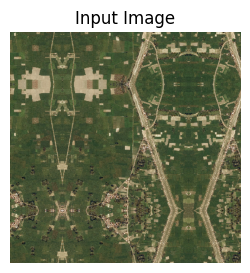

1


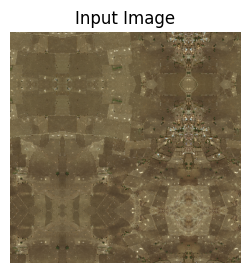

1


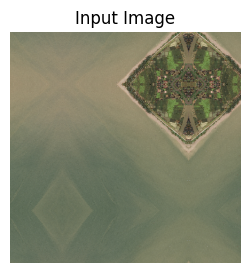

1


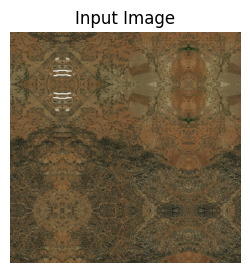

1


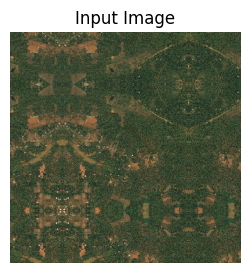

1


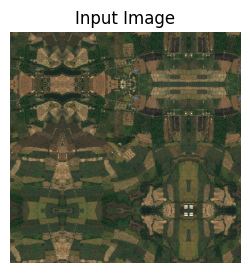

1


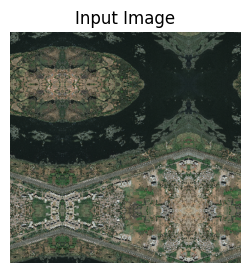

1


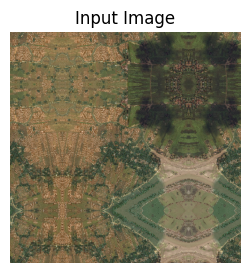

In [9]:
for i, m in train.take(10):
    display([i])